Estimate the end-use demand using 2000-2009 data from aggregate demand, population / GSP and temperature data from renewables.ninja (TAS demand data start from 2005-05-16)

In [1]:
import pandas as pd
import numpy as np
import os 

import matplotlib.pyplot as plt

%matplotlib inline

### load demand data

In [2]:
cwd=os.getcwd()
NEMWEB_data_dir=os.path.abspath(os.path.join(cwd, '../../raw_data/demand'))
df_agg_demand=pd.read_csv(NEMWEB_data_dir+'/AGGdemand_99to23.csv')

df_agg_demand['AEST']=pd.to_datetime(df_agg_demand['AEST'])
df_agg_demand=df_agg_demand.set_index('AEST')

df_agg_demand

,NSW,QLD,VIC,SA,TAS
AEST,,,,,
1999-01-01 00:00:00,6620.954165,3885.500000,3548.898330,1355.499165,NaN
1999-01-01 01:00:00,5827.261665,3554.416665,3600.685000,1215.285000,NaN
1999-01-01 02:00:00,5291.680835,3362.000000,3231.211670,1053.838330,NaN
1999-01-01 03:00:00,5037.879170,3305.000000,2947.056670,989.599170,NaN
1999-01-01 04:00:00,5009.253335,3253.333335,2776.745000,954.845830,NaN
...,...,...,...,...,...
2023-12-31 19:00:00,7003.640000,7713.544167,4142.055833,1280.285000,1092.000000
2023-12-31 20:00:00,6852.150833,7375.915000,4092.831667,1324.264167,1086.019167
2023-12-31 21:00:00,6932.140833,7072.898333,3907.715833,1300.128333,1090.417500


In [3]:
df_agg_demand_daily=df_agg_demand.groupby(df_agg_demand.index.date).sum()

NSW


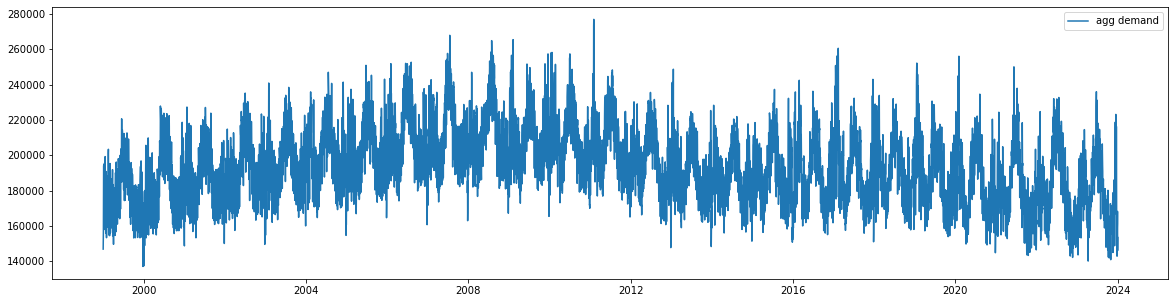

QLD


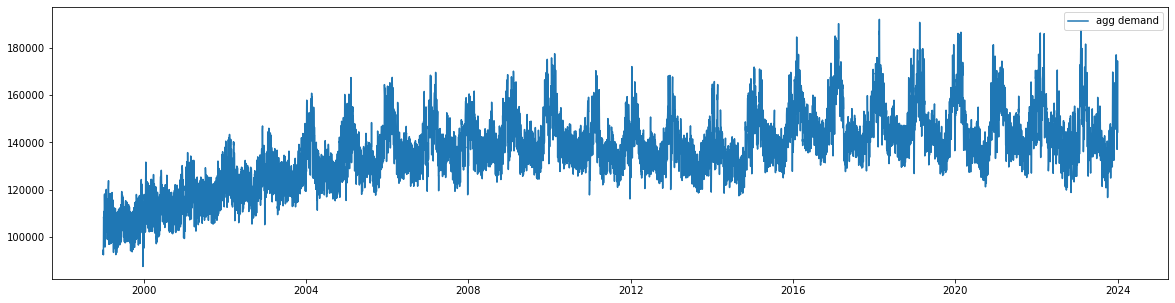

VIC


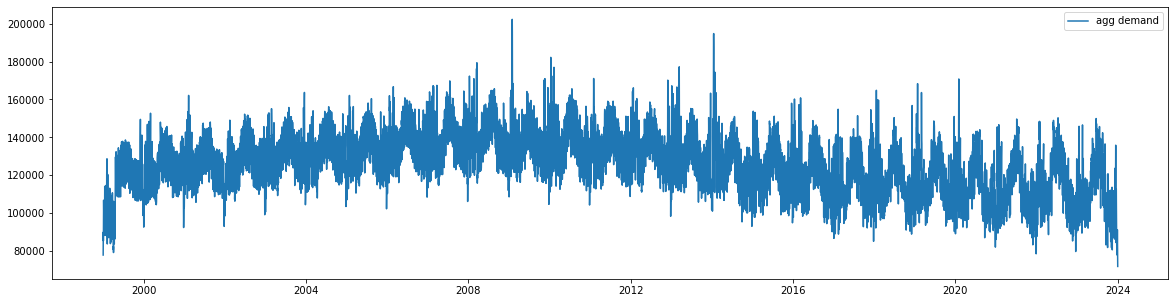

SA


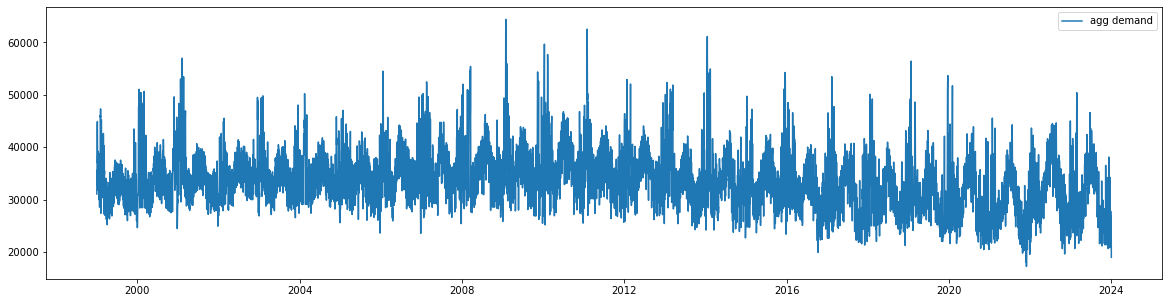

TAS


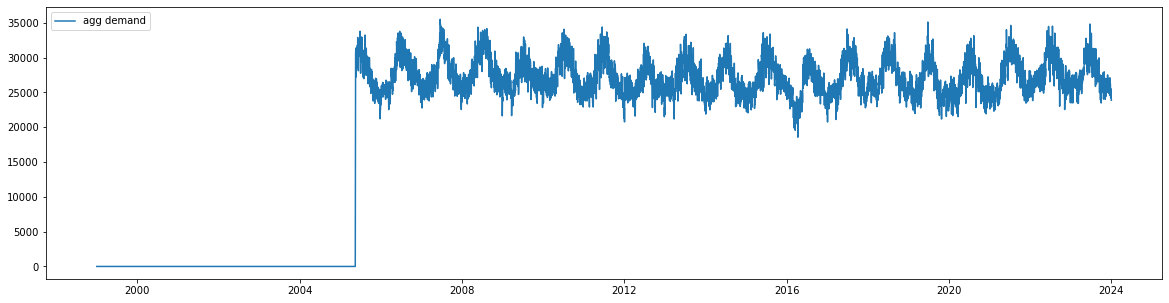

In [4]:
states=df_agg_demand.columns.to_list()
for state in states:
    print(state)
    plt.figure(figsize=(20,5))
    plt.plot(df_agg_demand_daily[state], label='agg demand')

    plt.legend()
    plt.show()

### load temperature data

In [5]:
df_temp=pd.read_csv('../state_temp_99to20.csv')
df_temp['AEST']=pd.to_datetime(df_temp['AEST'])
df_temp=df_temp.set_index('AEST')
df_temp.describe()

,QLD,NSW,VIC,SA,TAS
count,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000
mean,21.587875,17.522095,14.419752,16.745295,8.173638
std,4.966790,7.798788,6.242534,6.495654,5.291929
min,5.139330,-0.723486,-0.150276,1.440053,-3.318000
25%,18.175563,11.488619,9.733960,11.868721,4.356000
50%,21.810236,17.156216,13.358802,15.642713,7.220000
75%,24.976539,22.932441,18.065709,20.657965,11.153000
max,38.470705,44.082588,42.199165,43.174471,31.556000


In [6]:
df_temp

,QLD,NSW,VIC,SA,TAS
AEST,,,,,
1999-01-01 10:00:00,25.599078,26.323349,24.937765,31.875287,20.411
1999-01-01 11:00:00,25.873826,27.033059,26.750948,33.637305,21.620
1999-01-01 12:00:00,26.070542,27.380631,27.970991,34.929089,22.472
1999-01-01 13:00:00,26.115353,27.398371,28.623880,35.563446,23.025
1999-01-01 14:00:00,25.892187,27.051896,28.778779,35.568935,23.251
...,...,...,...,...,...
2020-01-01 05:00:00,22.813561,21.328615,12.770808,14.744928,5.960
2020-01-01 06:00:00,23.996990,23.041339,15.081442,15.976481,7.680
2020-01-01 07:00:00,25.642370,25.857283,17.167026,17.776210,9.669


NSW


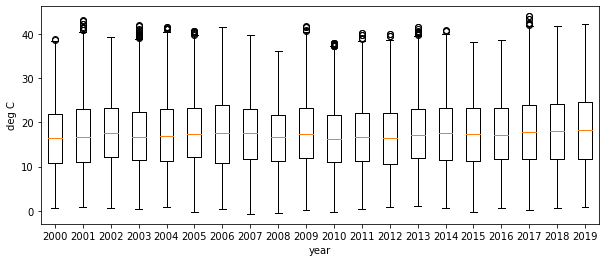

QLD


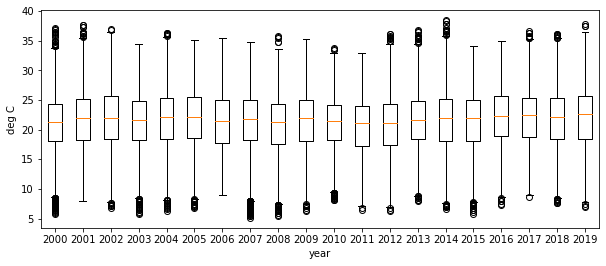

VIC


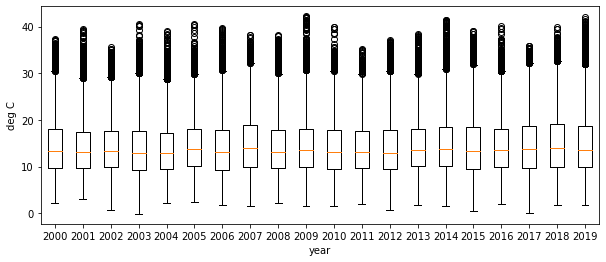

SA


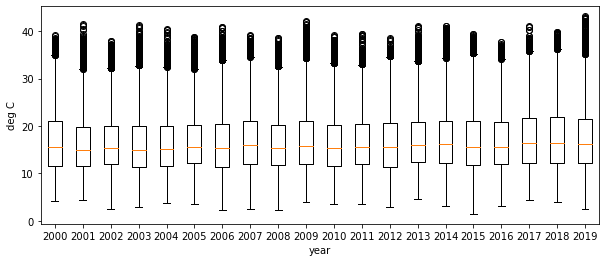

TAS


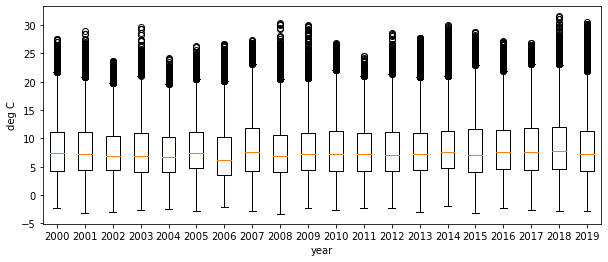

In [7]:
for state in states:
    print(state)
    data=[df_temp.loc[df_temp.index.year==year, state].values for year in range(2000, 2020)]

    # Creating plot
    plt.figure(figsize=(10,4))
    plt.boxplot(data)
    plt.xticks(range(1,21), range(2000, 2020))
    plt.xlabel('year')
    plt.ylabel('deg C')
    # show plot
    plt.show()


NSW KstestResult(statistic=0.013670788109706344, pvalue=6.969616349548414e-08, statistic_location=21.87039749580258, statistic_sign=1)


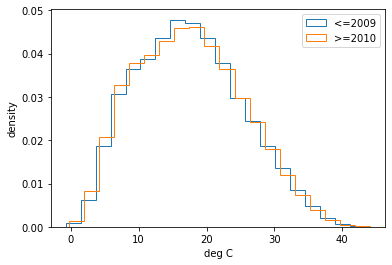

QLD KstestResult(statistic=0.0161583085548892, pvalue=7.637207934318764e-11, statistic_location=22.01636974460946, statistic_sign=1)


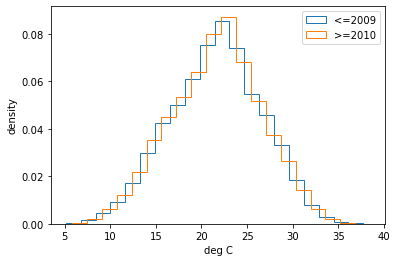

VIC KstestResult(statistic=0.018776445084282445, pvalue=1.713637909298295e-14, statistic_location=15.992158293793429, statistic_sign=1)


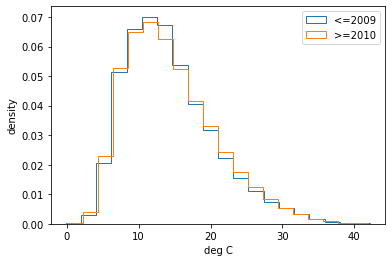

SA KstestResult(statistic=0.03059734149774007, pvalue=8.851850614814336e-38, statistic_location=17.389566038129633, statistic_sign=1)


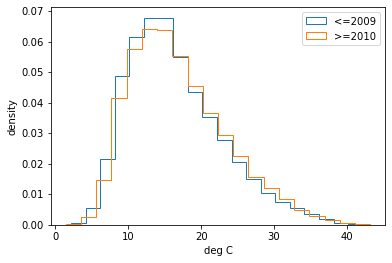

TAS KstestResult(statistic=0.024676342614803226, pvalue=1.0130062462392716e-24, statistic_location=10.216, statistic_sign=1)


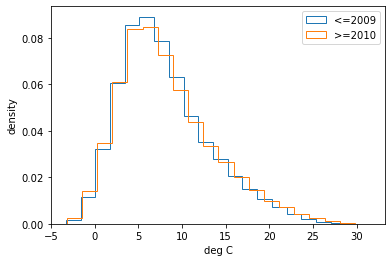

In [8]:
# compare temp distributions in the 2 halves of data
from scipy import stats

for state in states:
    
    data1=df_temp.loc[df_temp.index.year<=2009, state].values
    data2=df_temp.loc[df_temp.index.year>=2010, state].values
    
    # ks 2-sample test
    ks=stats.ks_2samp(data1, data2)
    print(state, ks)
    # Creating plot
    plt.hist(data1, bins=20, density=True, histtype='step', label='<=2009')
    plt.hist(data2, bins=20, density=True, histtype='step', label='>=2010')

    plt.ylabel('density')
    plt.xlabel('deg C')
    plt.legend()
    # show plot
    plt.show()


NSW Epps_Singleton_2sampResult(statistic=86.9013387753528, pvalue=5.990903930900303e-18)


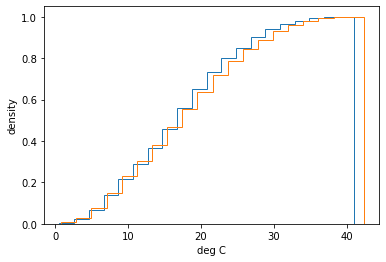

QLD Epps_Singleton_2sampResult(statistic=77.08389048669878, pvalue=7.219446283553634e-16)


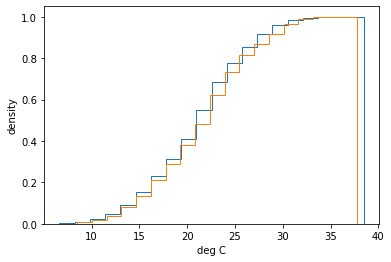

VIC Epps_Singleton_2sampResult(statistic=46.32369598151328, pvalue=2.1089552992026e-09)


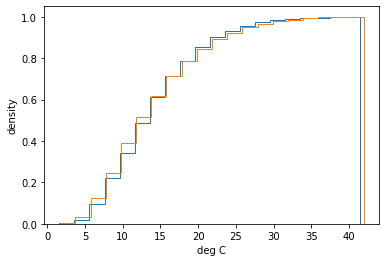

SA Epps_Singleton_2sampResult(statistic=52.869386651449986, pvalue=9.075251465327063e-11)


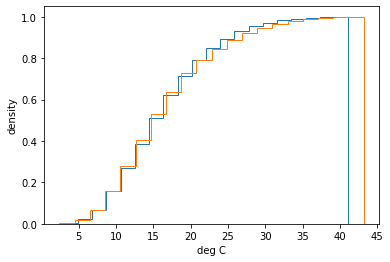

TAS Epps_Singleton_2sampResult(statistic=110.7828726501961, pvalue=4.954707439428412e-23)


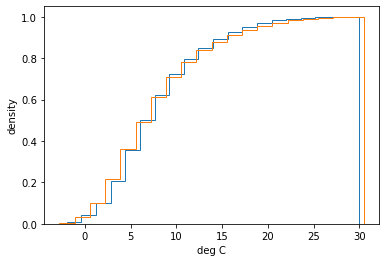

In [9]:
# compare temp distributions in the 2 halves of data
from scipy import stats

for state in states:
    
    data1=df_temp.loc[df_temp.index.year==2014, state].values
    data2=df_temp.loc[df_temp.index.year==2019, state].values
    
    # ks 2-sample test
    ks=stats.epps_singleton_2samp(data1, data2)
    print(state, ks)
    # Creating plot
    plt.hist(data1, bins=20, density=True, cumulative=True, histtype='step', label='<=2009')
    plt.hist(data2, bins=20, density=True, cumulative=True,histtype='step', label='>=2010')

    plt.ylabel('density')
    plt.xlabel('deg C')
    # show plot
    plt.show()


### load population data

In [10]:
# raw data is quarterly
df_popq=pd.read_csv('../../raw_data/state_population.csv', index_col=0)
df_popq['date']=pd.date_range(start='1981-06', end='2022-06', freq='3m')
df_popq

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AUS,date
Jun-1981,5234889,3946917,2345208,1318769,1300056,427224,122616,227581,14923260,1981-06-30
Sep-1981,5249455,3957333,2367477,1321235,1311284,427925,125186,228782,14988677,1981-09-30
Dec-1981,5266894,3968398,2387943,1325176,1320221,428283,127718,229484,15054117,1981-12-31
Mar-1982,5286119,3980826,2406355,1328670,1329700,429445,129593,230990,15121698,1982-03-31
Jun-1982,5303580,3992870,2424586,1331108,1338899,429845,130314,233045,15184247,1982-06-30
...,...,...,...,...,...,...,...,...,...,...
Mar-2021,8085668,6551771,5204023,1800063,2741251,567086,249440,452488,25656630,2021-03-31
Jun-2021,8093815,6548040,5217653,1803192,2749864,567909,249200,453558,25688079,2021-06-30
Sep-2021,8084439,6546470,5239787,1803441,2754150,567712,249787,452608,25703241,2021-09-30
Dec-2021,8095430,6559941,5265043,1806599,2762234,569827,249345,453324,25766605,2021-12-31


In [11]:
df_pop=df_popq[['date','VIC', 'QLD', 'SA', 'TAS']].copy()
# add ACT to NSW
df_pop['NSW']=df_popq[['NSW', 'ACT']].sum(axis=1)
# interpolate to monthly
df_pop=df_pop.set_index('date').resample('h').interpolate()
df_pop=df_pop[states]
df_pop

,NSW,QLD,VIC,SA,TAS
date,,,,,
1981-06-30 00:00:00,5.462470e+06,2.345208e+06,3.946917e+06,1.318769e+06,427224.000000
1981-06-30 01:00:00,5.462477e+06,2.345218e+06,3.946922e+06,1.318770e+06,427224.317482
1981-06-30 02:00:00,5.462484e+06,2.345228e+06,3.946926e+06,1.318771e+06,427224.634964
1981-06-30 03:00:00,5.462491e+06,2.345238e+06,3.946931e+06,1.318772e+06,427224.952446
1981-06-30 04:00:00,5.462499e+06,2.345248e+06,3.946936e+06,1.318773e+06,427225.269928
...,...,...,...,...,...
2022-03-30 20:00:00,8.585915e+06,5.296040e+06,6.593252e+06,1.815469e+06,571162.522222
2022-03-30 21:00:00,8.585932e+06,5.296055e+06,6.593268e+06,1.815473e+06,571163.141667
2022-03-30 22:00:00,8.585950e+06,5.296069e+06,6.593283e+06,1.815477e+06,571163.761111


In [12]:
# convert to population index where 2020-01-01 00:00:00 is 1

df_pop_index=df_pop/df_pop.loc[df_pop.index==pd.to_datetime('2020-01-01 00:00:00')].values
df_pop_index

,NSW,QLD,VIC,SA,TAS
date,,,,,
1981-06-30 00:00:00,0.641093,0.456529,0.599499,0.740139,0.764407
1981-06-30 01:00:00,0.641094,0.456531,0.599500,0.740139,0.764407
1981-06-30 02:00:00,0.641095,0.456533,0.599501,0.740140,0.764408
1981-06-30 03:00:00,0.641096,0.456535,0.599502,0.740140,0.764408
1981-06-30 04:00:00,0.641097,0.456537,0.599502,0.740141,0.764409
...,...,...,...,...,...
2022-03-30 20:00:00,1.007671,1.030951,1.001453,1.018904,1.021947
2022-03-30 21:00:00,1.007673,1.030954,1.001455,1.018906,1.021948
2022-03-30 22:00:00,1.007675,1.030957,1.001457,1.018908,1.021949


In [13]:
# population adjustment for agg demand

df_agg_demand_popadj=df_agg_demand.loc[df_agg_demand.index.year<=2020, states]
df_agg_demand_popadj=df_agg_demand_popadj/df_pop_index.loc[df_agg_demand_popadj.index]
df_agg_demand_popadj

,NSW,QLD,VIC,SA,TAS
AEST,,,,,
1999-01-01 00:00:00,8481.621348,5823.194830,5046.923876,1624.138142,NaN
1999-01-01 01:00:00,7464.867877,5326.990008,5120.562124,1456.134479,NaN
1999-01-01 02:00:00,6778.764626,5038.605926,4595.123966,1262.690681,NaN
1999-01-01 03:00:00,6453.628568,4953.170596,4191.018946,1185.719449,NaN
1999-01-01 04:00:00,6416.948034,4875.728605,3948.811920,1144.077682,NaN
...,...,...,...,...,...
2020-12-31 19:00:00,7239.755957,7146.751241,4309.419291,1198.295427,1109.065971
2020-12-31 20:00:00,7074.986845,6906.404624,4238.473749,1202.335005,1081.666791
2020-12-31 21:00:00,7055.360641,6630.079797,4081.502365,1168.378682,1070.059065


### load GSP data


In [14]:

df_gsp=pd.read_csv('../../raw_data/GSP.csv')
df_gsp['year']=df_gsp['year'].str.replace('Jun-', '')
df_gsp=df_gsp.set_index('year')
df_gsp['NSWACT']=df_gsp[['NSW', 'ACT']].sum(axis=1)
df_gsp=df_gsp.drop(['NSW', 'ACT'], axis=1)
df_gsp=df_gsp.rename({'NSWACT':'NSW'}, axis=1)
df_gsp

,VIC,QLD,SA,TAS,NSW
year,,,,,
1990,216165,141394,62973,17721,351312
1991,210558,141579,62741,17702,353238
1992,207543,146454,61664,18138,353952
1993,217875,155635,63323,18726,364053
1994,225250,163389,65059,19124,377622
1995,232307,172822,65967,19616,391501
1996,240327,178624,68639,20368,405914
1997,250923,188157,71249,20714,419369
1998,265717,195747,75166,21489,434957


In [15]:
df_gsp_idx=df_gsp/df_gsp.loc[df_gsp.index=='2020'].values
df_gsp_idx

,VIC,QLD,SA,TAS,NSW
year,,,,,
1990,0.439672,0.337861,0.539388,0.507314,0.489924
1991,0.428267,0.338303,0.537401,0.506770,0.492610
1992,0.422135,0.349951,0.528176,0.519252,0.493605
1993,0.443150,0.371889,0.542386,0.536085,0.507692
1994,0.458150,0.390418,0.557255,0.547479,0.526614
1995,0.472504,0.412958,0.565033,0.561564,0.545969
1996,0.488816,0.426822,0.587919,0.583092,0.566069
1997,0.510368,0.449601,0.610275,0.592998,0.584833
1998,0.540459,0.467737,0.643826,0.615184,0.606571


In [16]:
df_agg_demand_gspadj=df_agg_demand.copy()

for year in  range(1999, 2024):
    for state in states:
        factor=df_gsp_idx.loc[df_gsp_idx.index==str(year), state].values[0]
        df_agg_demand_gspadj.loc[df_agg_demand_gspadj.index.year==year, state]= \
        df_agg_demand_gspadj.loc[df_agg_demand_gspadj.index.year==year, state]/factor
        
        
        

### compare population and GSP adjustments

NSW


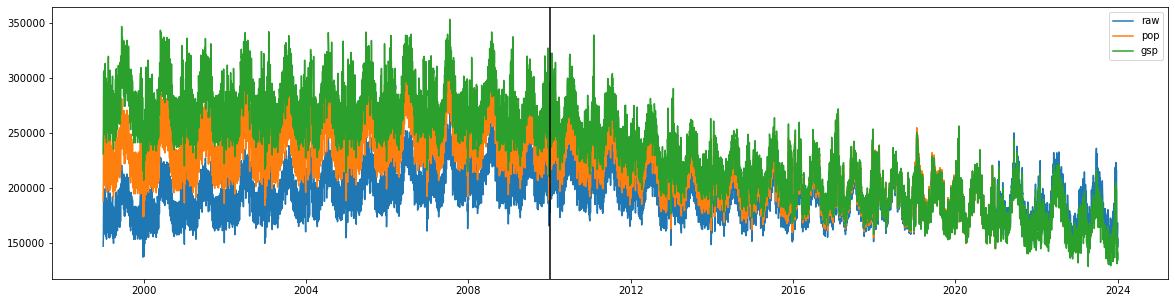

QLD


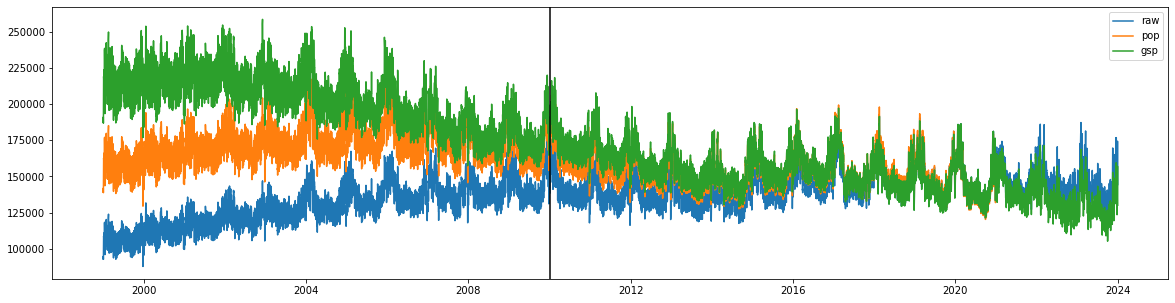

VIC


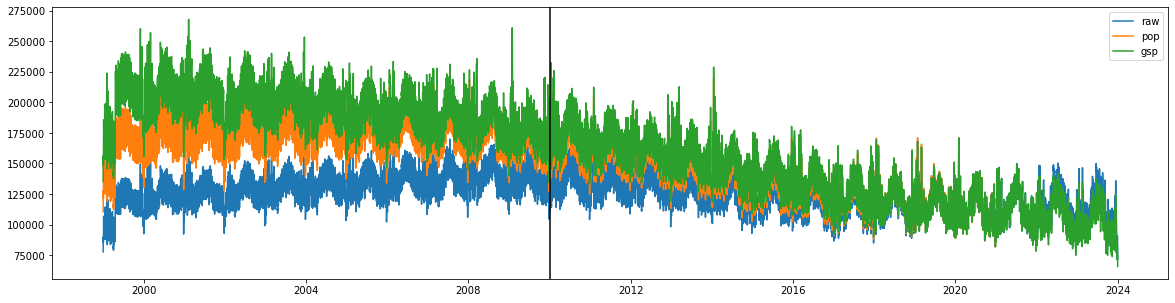

SA


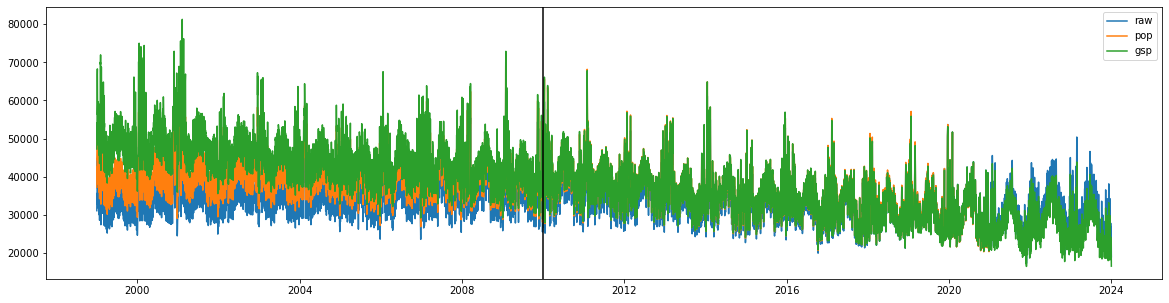

TAS


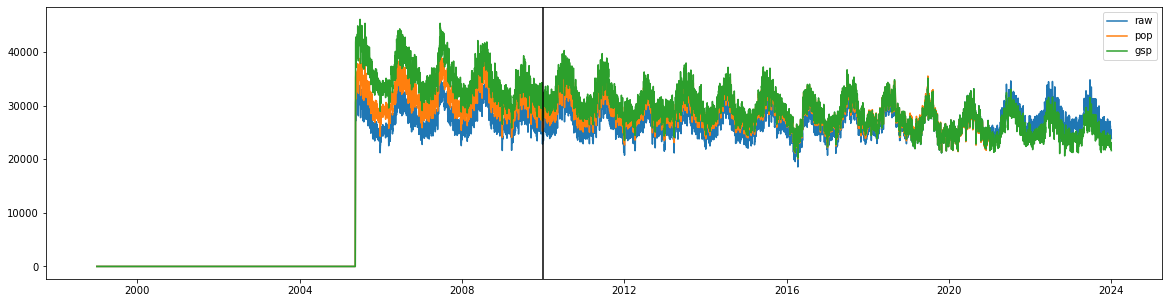

In [17]:
for state in states:
    print(state)
    plt.figure(figsize=(20,5))
    plt.plot(df_agg_demand[state].groupby(df_agg_demand.index.date).sum(), label='raw')
    plt.plot(df_agg_demand_popadj[state].groupby(df_agg_demand_popadj.index.date).sum(), label='pop')

    plt.plot(df_agg_demand_gspadj[state].groupby(df_agg_demand_gspadj.index.date).sum(), label='gsp')
    plt.axvline(pd.to_datetime('2010-01-01 00:00:00'), color='k')
    plt.legend()
    plt.show()

NSW


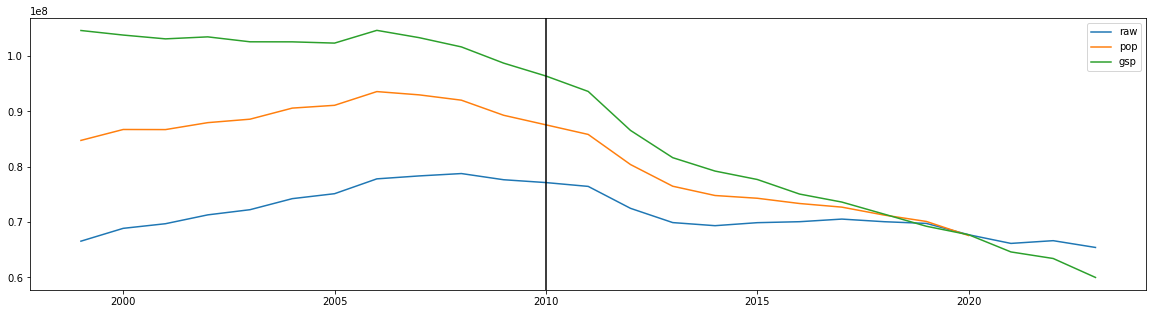

QLD


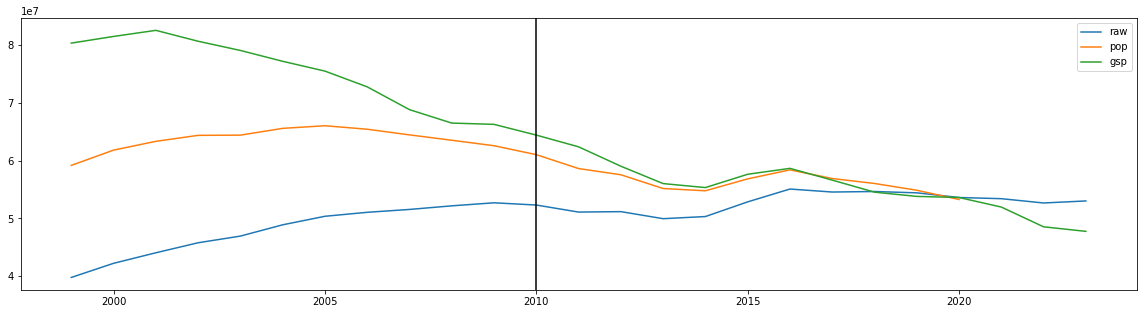

VIC


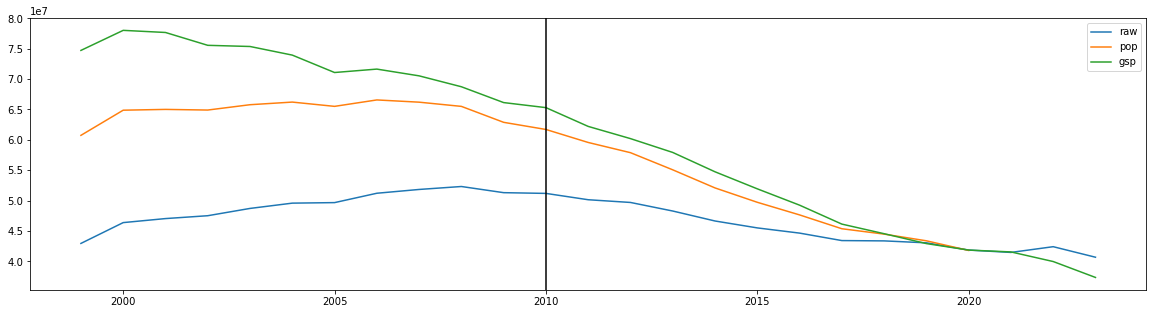

SA


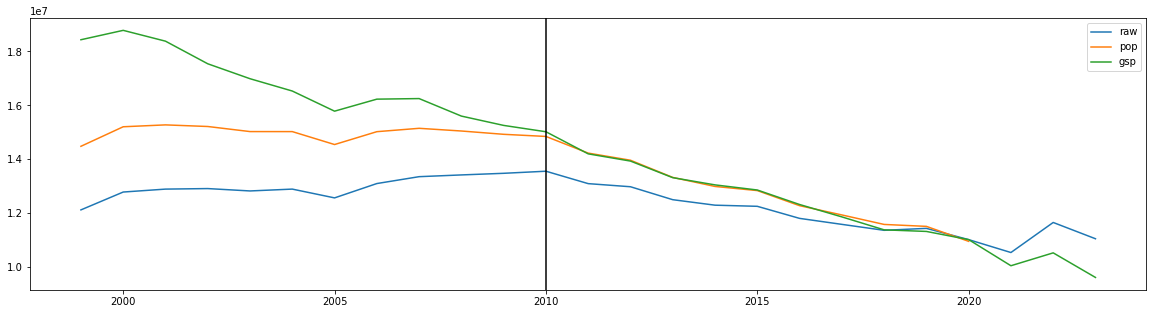

TAS


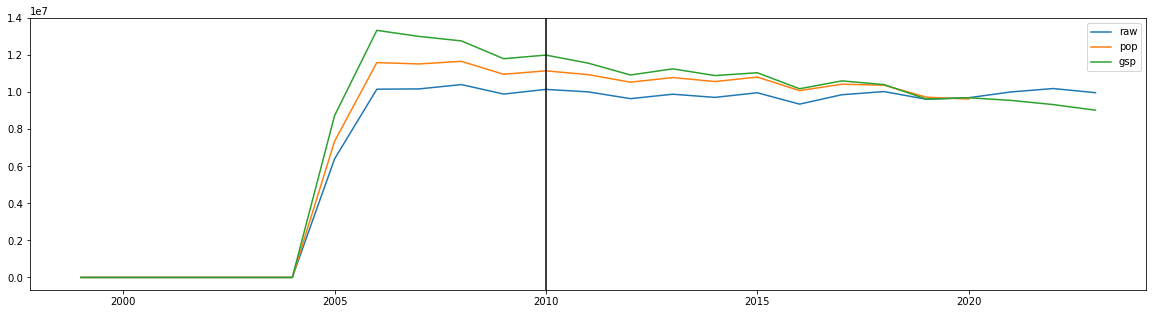

In [18]:
for state in states:
    print(state)
    plt.figure(figsize=(20,5))
    plt.plot(df_agg_demand[state].groupby(df_agg_demand.index.year).sum(), label='raw')
    plt.plot(df_agg_demand_popadj[state].groupby(df_agg_demand_popadj.index.year).sum(), label='pop')

    plt.plot(df_agg_demand_gspadj[state].groupby(df_agg_demand_gspadj.index.year).sum(), label='gsp')
    plt.axvline(2010, color='k')
    plt.legend()
    plt.show()

NSW


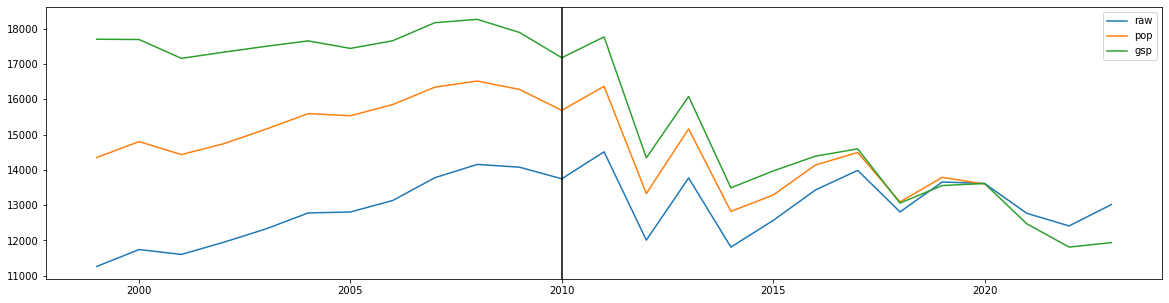

QLD


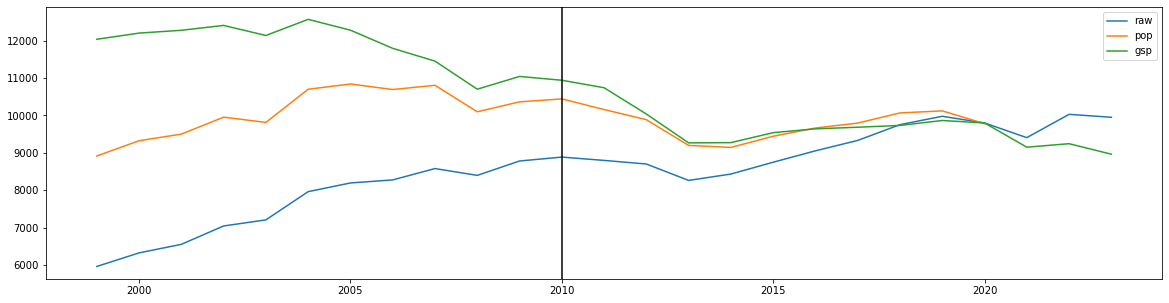

VIC


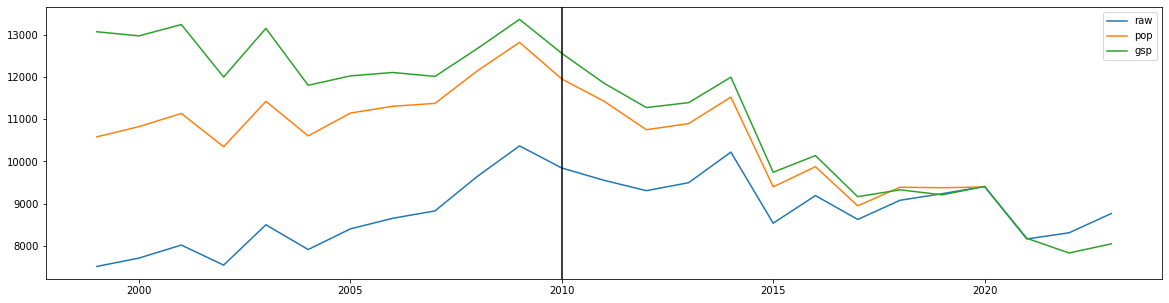

SA


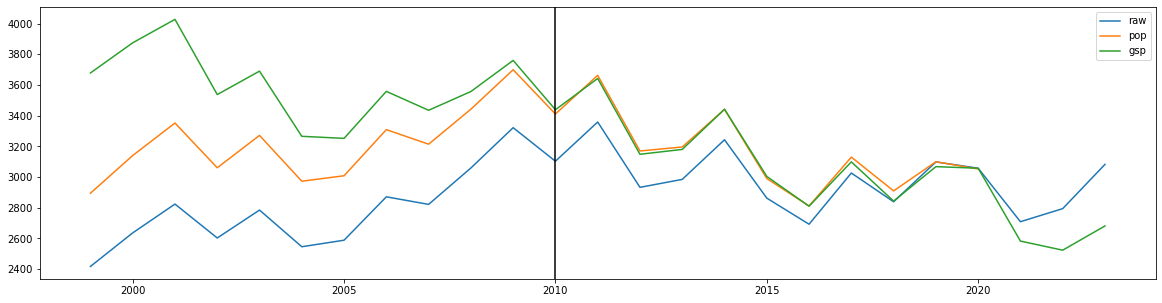

TAS


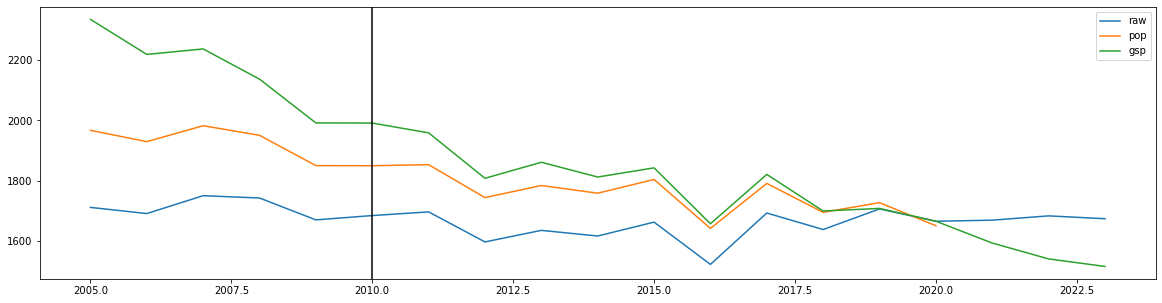

In [19]:
for state in states:
    print(state)
    plt.figure(figsize=(20,5))
    plt.plot(df_agg_demand[state].groupby(df_agg_demand.index.year).max(), label='raw')
    plt.plot(df_agg_demand_popadj[state].groupby(df_agg_demand_popadj.index.year).max(), label='pop')

    plt.plot(df_agg_demand_gspadj[state].groupby(df_agg_demand_gspadj.index.year).max(), label='gsp')
    plt.axvline(2010, color='k')
    plt.legend()
    plt.show()

### compare population adjusted demand and temperature

use population adjustment as the annual sums are flatter as seen above

NSW


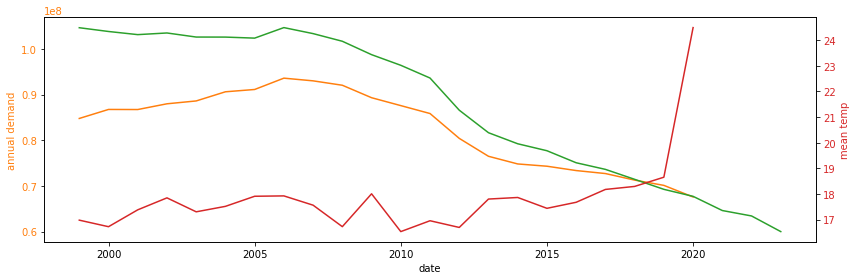

QLD


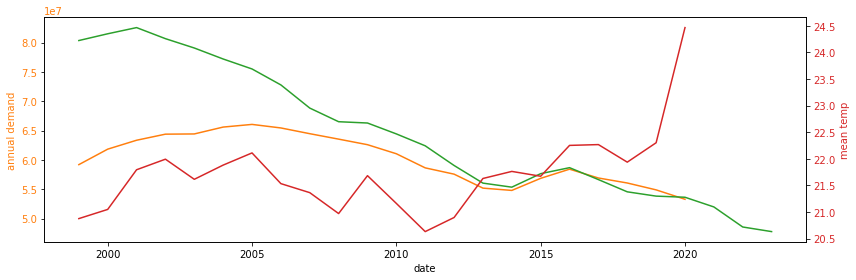

VIC


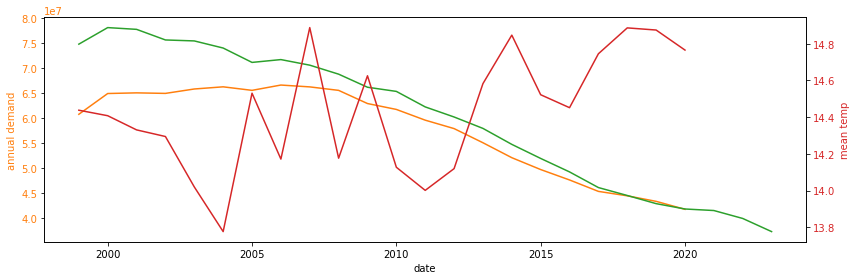

SA


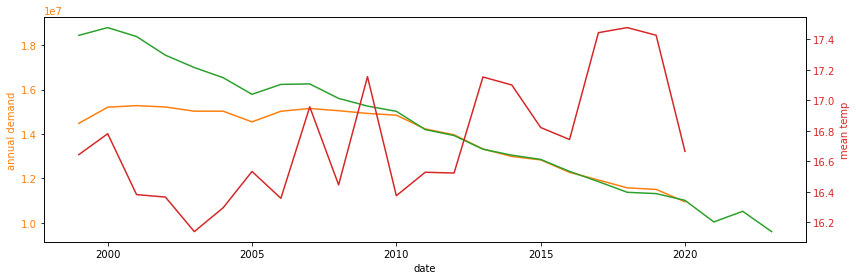

TAS


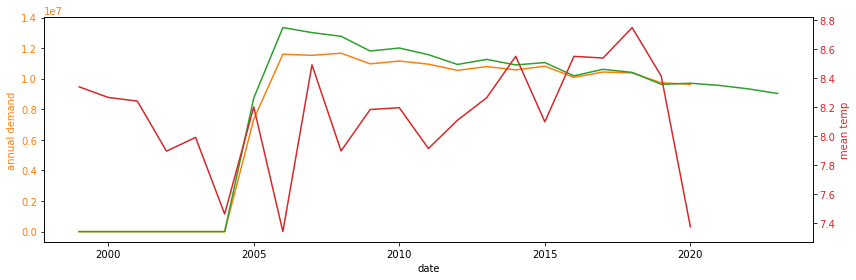

In [20]:
for state in states:
    print(state)
    
    fig, ax1 = plt.subplots(figsize=(12,4))

    color = 'tab:orange'
    ax1.set_xlabel('date')
    ax1.set_ylabel('annual demand', color=color)
    ax1.plot(df_agg_demand_popadj[state].groupby(df_agg_demand_popadj.index.year).sum(), color=color)
    ax1.plot(df_agg_demand_gspadj[state].groupby(df_agg_demand_gspadj.index.year).sum(), color='tab:green')

    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('mean temp', color=color)  # we already handled the x-label with ax1
    ax2.plot(df_temp[state].groupby(df_temp.index.year).mean(), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

NSW


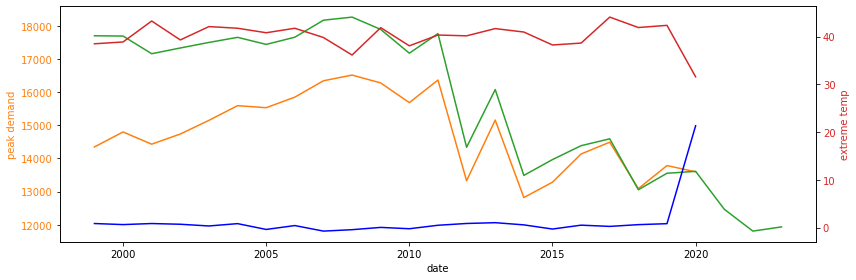

QLD


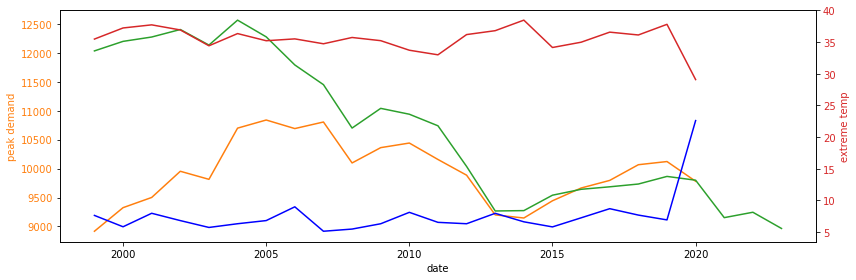

VIC


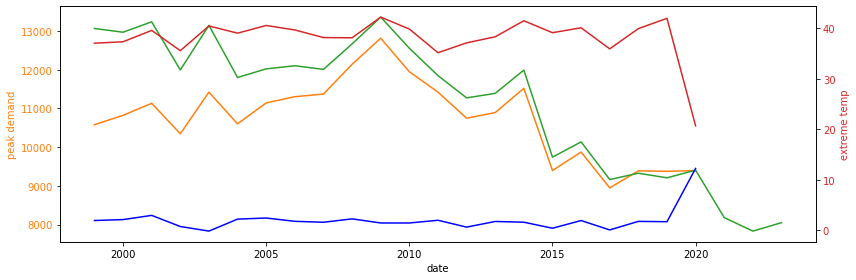

SA


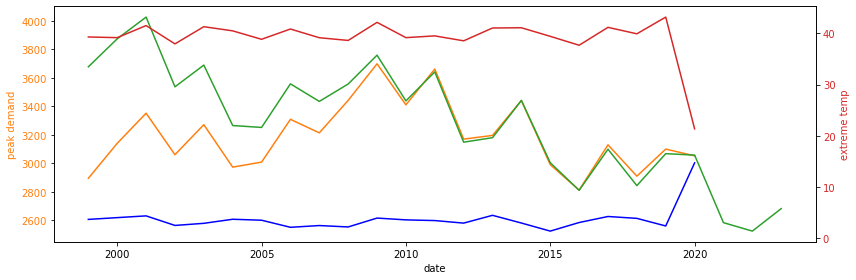

TAS


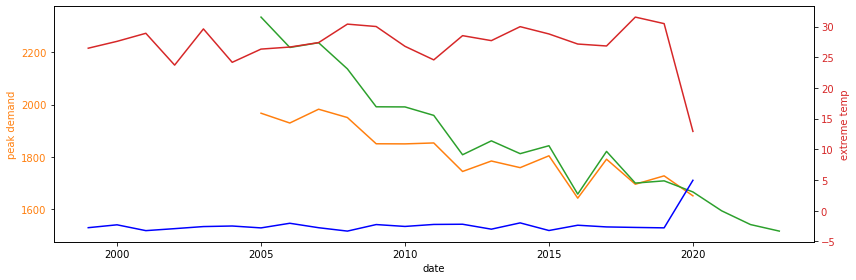

In [21]:
# peak demand
for state in states:
    print(state)
    
    fig, ax1 = plt.subplots(figsize=(12,4))

    color = 'tab:orange'
    ax1.set_xlabel('date')
    ax1.set_ylabel('peak demand', color=color)
    ax1.plot(df_agg_demand_popadj[state].groupby(df_agg_demand_popadj.index.year).max(), color=color)
    ax1.plot(df_agg_demand_gspadj[state].groupby(df_agg_demand_gspadj.index.year).max(), color='tab:green')

    
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('extreme temp', color=color)  # we already handled the x-label with ax1
    ax2.plot(df_temp[state].groupby(df_temp.index.year).max(), color=color)
    ax2.plot(df_temp[state].groupby(df_temp.index.year).min(), color='blue')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

We shall choose the population adjusted demand data. TAS data started only from May 2005, need to model the demand values prior to this using data from 2006-2010

In [22]:
df_TAS_train=pd.concat([df_agg_demand_popadj.loc[(df_agg_demand_popadj.index.year>=2006) & 
                                             (df_agg_demand_popadj.index.year<=2010), 'TAS'],
                    (df_temp.loc[(df_temp.index.year>=2006) & (df_temp.index.year<=2010), 'TAS']).rename(
                        ('TAS_temp'))], axis=1)
# add datetime feature
df_TAS_train['dayofweek']=df_TAS_train.index.dayofweek
df_TAS_train['hourofday']=df_TAS_train.index.hour
df_TAS_train['month']=df_TAS_train.index.month
df_TAS_train

,TAS,TAS_temp,dayofweek,hourofday,month
AEST,,,,,
2006-01-01 00:00:00,1071.396368,11.897,6,0,1
2006-01-01 01:00:00,1047.491087,11.462,6,1,1
2006-01-01 02:00:00,1037.473989,11.518,6,2,1
2006-01-01 03:00:00,1028.499835,11.675,6,3,1
2006-01-01 04:00:00,1031.866121,11.961,6,4,1
...,...,...,...,...,...
2010-12-31 19:00:00,1195.585719,14.288,4,19,12
2010-12-31 20:00:00,1214.940043,12.414,4,20,12
2010-12-31 21:00:00,1196.054501,11.595,4,21,12


In [23]:
# check
df_TAS_train[df_TAS_train.isna().any(axis=1)]

,TAS,TAS_temp,dayofweek,hourofday,month
AEST,,,,,


In [24]:
from sklearn.ensemble import RandomForestRegressor

X_train=df_TAS_train.drop(['TAS'], axis=1)
y_train=df_TAS_train['TAS']
model_TAS=RandomForestRegressor(n_estimators=100, random_state=2468).fit(X_train, y_train)

In [25]:
# examine feature importance
print(X_train.columns)
model_TAS.feature_importances_

Index(['TAS_temp', 'dayofweek', 'hourofday', 'month'], dtype='object')


array([0.34302966, 0.06983557, 0.48741873, 0.09971604])

In [26]:
X_predict=df_temp[['TAS']].rename({'TAS':'TAS_temp'}, axis=1)
X_predict['dayofweek']=X_predict.index.dayofweek
X_predict['hourofday']=X_predict.index.hour
X_predict['month']=X_predict.index.month
X_predict

,TAS_temp,dayofweek,hourofday,month
AEST,,,,
1999-01-01 10:00:00,20.411,4,10,1
1999-01-01 11:00:00,21.620,4,11,1
1999-01-01 12:00:00,22.472,4,12,1
1999-01-01 13:00:00,23.025,4,13,1
1999-01-01 14:00:00,23.251,4,14,1
...,...,...,...,...
2020-01-01 05:00:00,5.960,2,5,1
2020-01-01 06:00:00,7.680,2,6,1
2020-01-01 07:00:00,9.669,2,7,1


In [27]:
y_predict=model_TAS.predict(X_predict)
y_predict=pd.Series(index=X_predict.index, data=y_predict)

In [28]:
y_predict

AEST
1999-01-01 10:00:00    1346.005390
1999-01-01 11:00:00    1325.997595
1999-01-01 12:00:00    1313.151250
1999-01-01 13:00:00    1290.467202
1999-01-01 14:00:00    1321.597372
                          ...     
2020-01-01 05:00:00    1186.286007
2020-01-01 06:00:00    1256.526348
2020-01-01 07:00:00    1343.721182
2020-01-01 08:00:00    1335.011049
2020-01-01 09:00:00    1270.055417
Length: 184080, dtype: float64

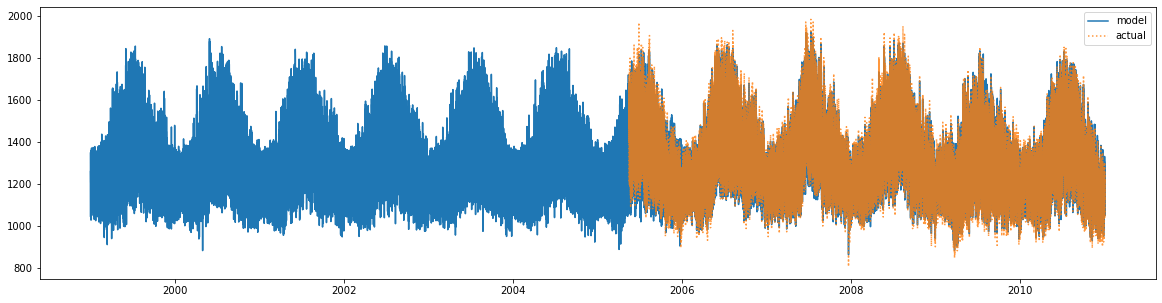

In [29]:
# compare with 2005 actual data from mid May

plt.figure(figsize=(20, 5))
plt.plot(y_predict.loc[y_predict.index.year<=2010], label='model')
plt.plot(df_agg_demand_popadj.loc[df_agg_demand_popadj.index.year<=2010, 'TAS'], label='actual', alpha=0.8, 
         linestyle=':')

plt.legend()
plt.show()

In [30]:
# compare result for 2015 where data are available
from sklearn.metrics import mean_squared_error
y_TAS_truth=df_agg_demand_popadj['TAS'].dropna()
y_TAS_truth=y_TAS_truth.loc[y_TAS_truth.index.year<=2015]
RMSE=np.sqrt(mean_squared_error(y_TAS_truth, y_predict.loc[y_TAS_truth.index]))
print('RMSE= ', RMSE)
print('NRMSE = ', RMSE/y_TAS_truth.mean())

RMSE=  79.73482561375825
NRMSE =  0.06297669387841472


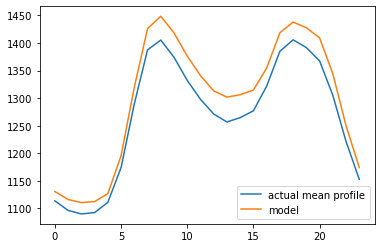

In [31]:
plt.plot(y_TAS_truth.groupby(y_TAS_truth.index.hour).mean(), label='actual mean profile')
y_predict_compare=y_predict.loc[y_TAS_truth.index]
plt.plot(y_predict_compare.groupby(y_predict_compare.index.hour).mean(), label='model')
plt.legend()
plt.show()

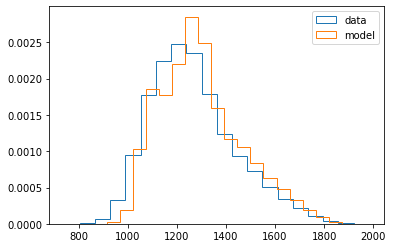

In [32]:
plt.hist(y_TAS_truth, density=True, bins=20, histtype='step', label='data')
plt.hist(y_predict_compare, density=True, bins=20, histtype='step', label='model')
plt.legend()
plt.show()

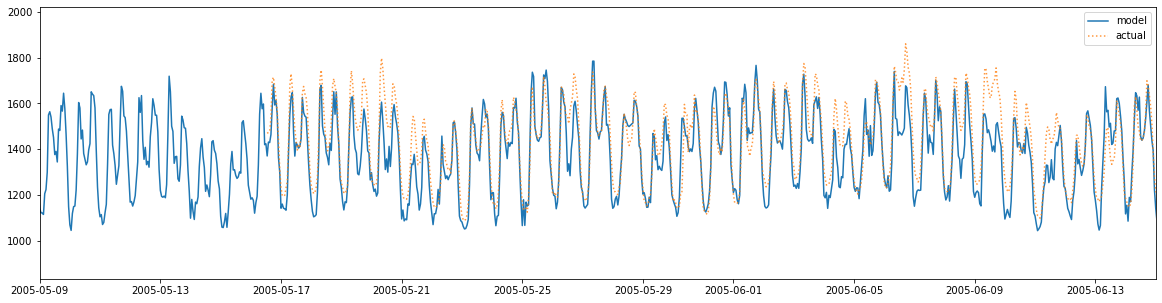

In [33]:
#plot

plt.figure(figsize=(20, 5))
plt.plot(y_predict.loc[(y_predict.index.year==2005)], label='model')
plt.plot(df_agg_demand_popadj.loc[(df_agg_demand_popadj.index.year==2005) 
                                  , 'TAS'], label='actual', alpha=0.8, 
         linestyle=':')

plt.xlim(pd.to_datetime('2005-05-09'), pd.to_datetime('2005-06-15'))

plt.legend()
plt.show()

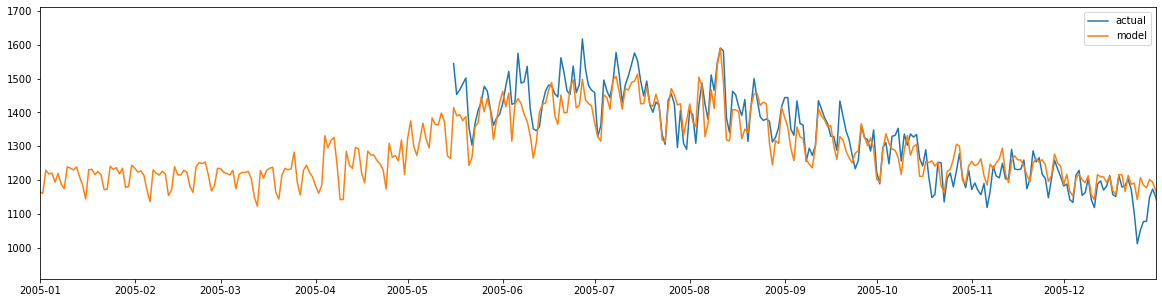

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(y_TAS_truth.groupby(y_TAS_truth.index.date).mean(), label='actual')
plt.plot(y_predict.groupby(y_predict.index.date).mean(), label='model')
plt.xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2005-12-31'))

plt.legend()
plt.show()

Random forest would not capture the extreme values or produce smooth profiles but since TAS is the smallest out of the 5 states in the NEM it does not matter too much as we only need the TOTAL NEM demand. 

### output levelised (population adjusted) end-use demand time series 

In [35]:
df_demand00to10=df_agg_demand_popadj.loc[(df_agg_demand_popadj.index.year>=2000) &
                                         (df_agg_demand_popadj.index.year<=2010)].copy()
df_demand00to10.loc[df_demand00to10.index<=pd.to_datetime('2005-05-16 23:00:00'), 'TAS']=y_predict.\
        loc[(y_predict.index>=pd.to_datetime('2000-01-01 00:00:00')) & 
              (y_predict.index<=pd.to_datetime('2005-05-16 23:00:00'))]
df_demand00to10

,NSW,QLD,VIC,SA,TAS
AEST,,,,,
2000-01-01 00:00:00,8329.481952,5726.432366,6144.580476,1611.002446,1066.124437
2000-01-01 01:00:00,7377.478612,5548.286510,6388.840815,1463.841815,1049.928623
2000-01-01 02:00:00,6544.479503,5262.845013,5783.082886,1272.836862,1025.744617
2000-01-01 03:00:00,6060.659007,5028.138427,5218.125017,1129.042928,1098.926249
2000-01-01 04:00:00,5916.311304,4896.005504,4916.122613,1065.894377,1134.457590
...,...,...,...,...,...
2010-12-31 19:00:00,9969.981076,6887.440100,7559.175163,2062.432656,1195.585719
2010-12-31 20:00:00,9599.152714,6697.761726,7201.940149,1910.393661,1214.940043
2010-12-31 21:00:00,9603.083863,6383.110733,6804.923827,1809.886939,1196.054501


In [36]:
df_demand00to10['NEM']=df_demand00to10[states].sum(axis=1)
df_demand00to10.describe()

,NSW,QLD,VIC,SA,TAS,NEM
count,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,10238.619188,7286.345061,7416.706570,1713.931078,1297.738537,27953.340435
std,1625.809500,1091.982252,1020.142272,334.075987,171.783759,3877.262152
min,5916.311304,4538.426892,4464.685012,886.844603,806.537767,17691.397507
25%,9085.388367,6406.022419,6618.252977,1466.837929,1173.426792,24973.199351
50%,10335.490764,7408.252849,7365.405910,1706.139496,1275.968127,28184.497187
75%,11337.867939,8078.283480,8173.126766,1899.828855,1397.466637,30871.644083
max,16515.900731,10841.070069,12817.381362,3699.151861,1982.340431,41732.118584


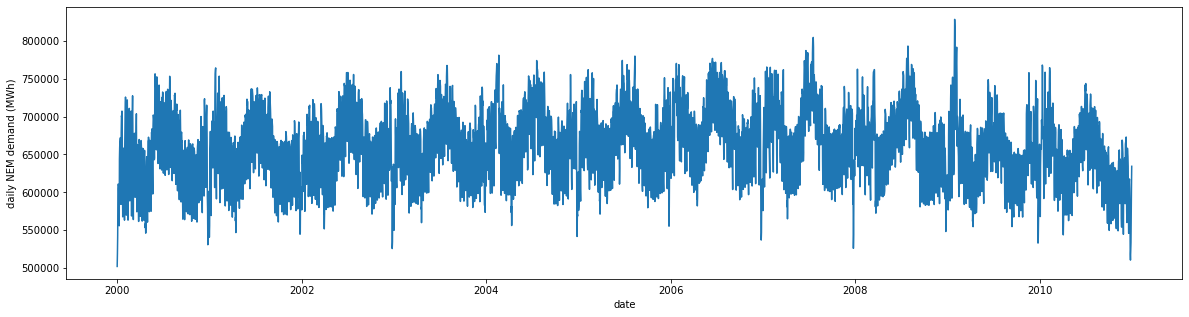

In [37]:
plt.figure(figsize=(20,5))
plt.plot(df_demand00to10['NEM'].groupby(df_demand00to10.index.date).sum())
plt.xlabel('date')
plt.ylabel('daily NEM demand (MWh)')
plt.show()

In [38]:
pop_factor=df_pop.loc[df_pop.index==pd.to_datetime('2020-01-01 00:00:00')]
pop_factor_sum=pop_factor.values.sum()
pop_factor=pop_factor/pop_factor_sum

S_NEM_temp_00to10=df_temp.loc[(df_temp.index.year>=2000) & (df_temp.index.year<=2010)].copy()
for state in states:
    S_NEM_temp_00to10[state]=S_NEM_temp_00to10[state]*pop_factor[state].values[0]
    
S_NEM_temp_00to10['NEM']=S_NEM_temp_00to10.sum(axis=1)
S_NEM_temp_00to10

,QLD,NSW,VIC,SA,TAS,NEM
AEST,,,,,,
2000-01-01 00:00:00,4.869462,5.348347,2.990492,1.031057,0.072962,14.312321
2000-01-01 01:00:00,4.804083,5.098437,2.829905,0.989878,0.058112,13.780415
2000-01-01 02:00:00,4.722879,4.868926,2.677440,0.947087,0.052469,13.268800
2000-01-01 03:00:00,4.618910,4.657557,2.551648,0.906439,0.042470,12.777025
2000-01-01 04:00:00,4.524821,4.472153,2.452448,0.867015,0.034650,12.351087
...,...,...,...,...,...,...
2010-12-31 19:00:00,5.242924,10.142848,7.979271,2.065502,0.353623,25.784167
2010-12-31 20:00:00,5.156202,9.719221,7.433971,1.898621,0.307242,24.515257
2010-12-31 21:00:00,5.102129,9.331429,7.049610,1.792620,0.286972,23.562761


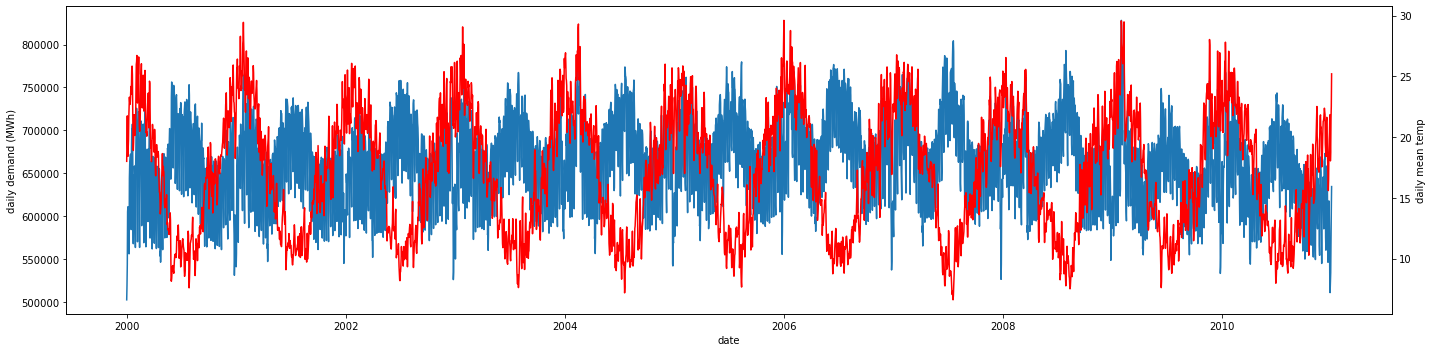

In [39]:
fig, ax1 = plt.subplots(figsize=(20,5))

ax1.set_xlabel('date')
ax1.set_ylabel('daily demand (MWh)')
ax1.plot(df_demand00to10['NEM'].groupby(df_demand00to10.index.date).sum() )

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('daily mean temp')  # we already handled the x-label with ax1
ax2.plot(S_NEM_temp_00to10['NEM'].groupby(S_NEM_temp_00to10.index.date).mean(), color='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

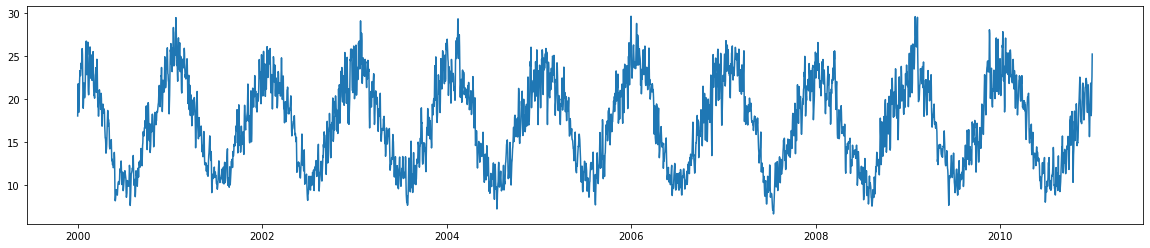

In [40]:
plt.figure(figsize=(20,4))
plt.plot(S_NEM_temp_00to10['NEM'].groupby(S_NEM_temp_00to10.index.date).mean())
plt.show()

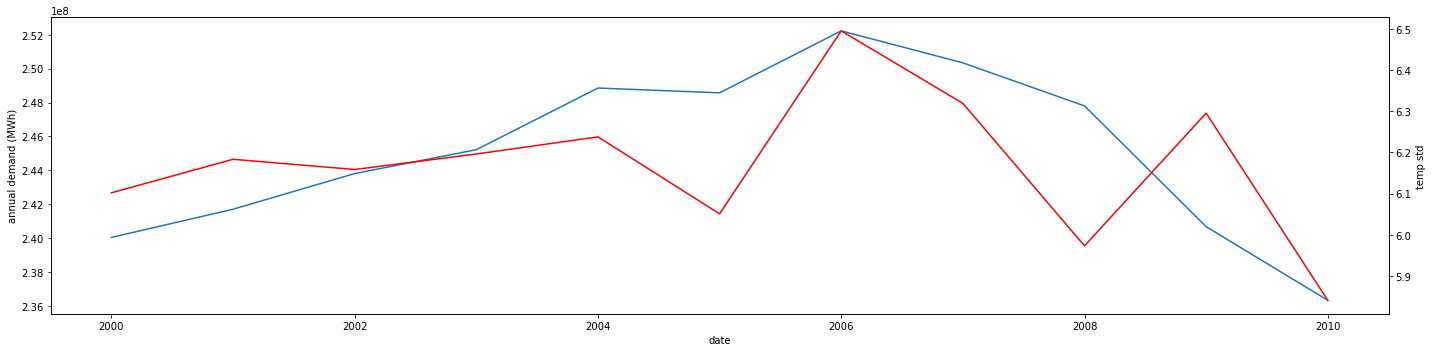

In [41]:
fig, ax1 = plt.subplots(figsize=(20,5))

ax1.set_xlabel('date')
ax1.set_ylabel('annual demand (MWh)')
ax1.plot(df_demand00to10['NEM'].groupby(df_demand00to10.index.year).sum() )

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('temp std')  # we already handled the x-label with ax1
ax2.plot(S_NEM_temp_00to10['NEM'].groupby(S_NEM_temp_00to10.index.year).std(), color='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [42]:
df_demand00to10

,NSW,QLD,VIC,SA,TAS,NEM
AEST,,,,,,
2000-01-01 00:00:00,8329.481952,5726.432366,6144.580476,1611.002446,1066.124437,22877.621677
2000-01-01 01:00:00,7377.478612,5548.286510,6388.840815,1463.841815,1049.928623,21828.376375
2000-01-01 02:00:00,6544.479503,5262.845013,5783.082886,1272.836862,1025.744617,19888.988882
2000-01-01 03:00:00,6060.659007,5028.138427,5218.125017,1129.042928,1098.926249,18534.891628
2000-01-01 04:00:00,5916.311304,4896.005504,4916.122613,1065.894377,1134.457590,17928.791389
...,...,...,...,...,...,...
2010-12-31 19:00:00,9969.981076,6887.440100,7559.175163,2062.432656,1195.585719,27674.614714
2010-12-31 20:00:00,9599.152714,6697.761726,7201.940149,1910.393661,1214.940043,26624.188292
2010-12-31 21:00:00,9603.083863,6383.110733,6804.923827,1809.886939,1196.054501,25797.059862


In [43]:
# check for duplicate
df_demand00to10[df_demand00to10.index.duplicated()]

,NSW,QLD,VIC,SA,TAS,NEM
AEST,,,,,,


In [44]:
# check for nan

df_demand00to10[df_demand00to10.isna().any(axis=1)]

,NSW,QLD,VIC,SA,TAS,NEM
AEST,,,,,,


In [45]:
# save
df_demand00to10.to_csv('POPadjusted_demand_00to10.csv')